In [45]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy

In [46]:
# creating a dataframe to store the results of each model
res = pd.DataFrame(columns = ['DataSet', 'TestMSE'])
# # list of all datasets
# datasets = ['ParkinsonsTelemonitoring', 'WineQualityRed', 'WineQualityWhite', 'EnergyEfficiency', 'SuperConductivity', 'ForestFires']

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 1000)              22000     
                                                                 
 dense_53 (Dense)            (None, 500)               500500    
                                                                 
 dense_54 (Dense)            (None, 250)               125250    
                                                                 
 dense_55 (Dense)            (None, 1)                 251       
                                                                 
Total params: 648,001
Trainable params: 648,001
Non-trainable params: 0
_________________________________________________________________
37/37 [==============================] - 0s 756us/step

MSE for Neural Networks: 0.33709634864413157


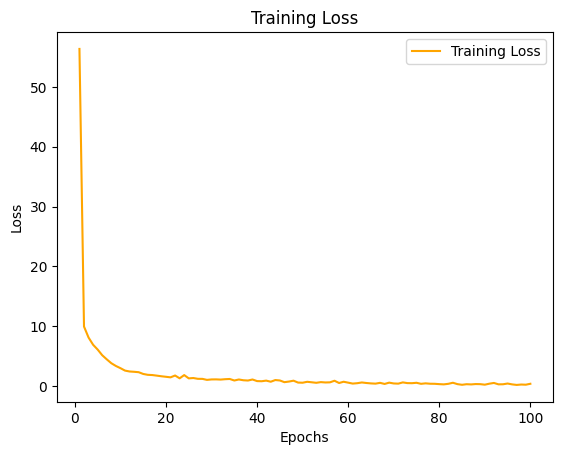

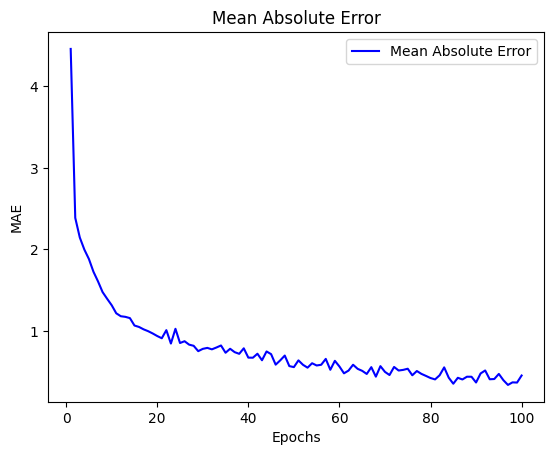

In [47]:
# loading Parkinsons Telemontioring dataset into a dataframe
pdata = pd.read_csv('parkinsons_updrs.data')
pdata.head()

pdata.shape

# drop NAs
pdata.dropna(axis=0, inplace=True)
pdata.shape

# define X matrix and y variable
y = pdata['total_UPDRS']
X = pdata.drop('total_UPDRS', axis = 1)

# splitting the data into training and test data - 80:20 split
x_tr, x_test, y_tr, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 6)

# normalizing the data
min_max_scaler = MinMaxScaler()
x_tr = min_max_scaler.fit_transform(x_tr)
x_test = min_max_scaler.transform(x_test)

model = Sequential()
model.add(Dense(1000, input_shape=(x_tr.shape[1],), activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = "mse", metrics = ['mae'])

parkinsons = model.fit(x_tr, y_tr, epochs = 100, batch_size = 16, verbose = 0)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("\nMSE for Neural Networks:", mse)

# add MSE to the dataframe
# res = res.append({'DataSet': 'ParkinsonsTelemonitoring', 'TestMSE': mse}, ignore_index = True)
res.loc['a'] = ['ParkinsonsTelemonitoring', mse]

history = parkinsons.history

loss = history['loss']
mae = history['mae']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'orange', label = "Training Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

epochs = range(1, len(loss) + 1)
plt.plot(epochs, mae, 'blue', label = "Mean Absolute Error")
plt.title("Mean Absolute Error")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [48]:
# Wine Quality - Red
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

# drop NAs
data.dropna(axis=0, inplace=True)

# define X matrix and y variable
y = data['quality']
X = data.drop('quality', axis = 1)

# splitting the data into training and test data - 80:20 split
x_tr, x_test, y_tr, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 6)

# normalizing the data
min_max_scaler = MinMaxScaler()
x_tr = min_max_scaler.fit_transform(x_tr)
x_test = min_max_scaler.transform(x_test)

model = Sequential()
model.add(Dense(1000, input_shape=(x_tr.shape[1],), activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = "mse", metrics = ['mae'])

parkinsons = model.fit(x_tr, y_tr, epochs = 100, batch_size = 16, verbose = 0)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
# print("\nMSE for Neural Networks:", mse)

# add MSE to the dataframe
# res = res.append({'DataSet': 'WineQualityRed', 'TestMSE': mse}, ignore_index = True)
res.loc['b'] = ['WineQualityRed', mse]


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 1000)              12000     
                                                                 
 dense_57 (Dense)            (None, 500)               500500    
                                                                 
 dense_58 (Dense)            (None, 250)               125250    
                                                                 
 dense_59 (Dense)            (None, 1)                 251       
                                                                 
Total params: 638,001
Trainable params: 638,001
Non-trainable params: 0
_________________________________________________________________
10/10 [==============================] - 0s 920us/step


In [49]:
# Wine Quality - White
data = pd.read_csv('winequality-white.csv', sep = ';')
data.head()

# drop NAs
data.dropna(axis=0, inplace=True)

# define X matrix and y variable
y = data['quality']
X = data.drop('quality', axis = 1)

# splitting the data into training and test data - 80:20 split
x_tr, x_test, y_tr, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 6)

# normalizing the data
min_max_scaler = MinMaxScaler()
x_tr = min_max_scaler.fit_transform(x_tr)
x_test = min_max_scaler.transform(x_test)

model = Sequential()
model.add(Dense(1000, input_shape=(x_tr.shape[1],), activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = "mse", metrics = ['mae'])

parkinsons = model.fit(x_tr, y_tr, epochs = 100, batch_size = 16, verbose = 0)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
# print("\nMSE for Neural Networks:", mse)

# add MSE to the dataframe
# res = res.append({'DataSet': 'WineQualityRed', 'TestMSE': mse}, ignore_index = True)
res.loc['c'] = ['WineQualityWhite', mse]


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 1000)              12000     
                                                                 
 dense_61 (Dense)            (None, 500)               500500    
                                                                 
 dense_62 (Dense)            (None, 250)               125250    
                                                                 
 dense_63 (Dense)            (None, 1)                 251       
                                                                 
Total params: 638,001
Trainable params: 638,001
Non-trainable params: 0
_________________________________________________________________
31/31 [==============================] - 0s 776us/step


In [50]:
# Energy Efficiency - Heating Load
data = pd.read_excel('ENB2012_data.xlsx')
data.head()

# drop NAs
data.dropna(axis=0, inplace=True)

# define X matrix and y variable
y = data['Y1']
X = data.drop(['Y1', 'Y2'], axis = 1)

# splitting the data into training and test data - 80:20 split
x_tr, x_test, y_tr, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 6)

# normalizing the data
min_max_scaler = MinMaxScaler()
x_tr = min_max_scaler.fit_transform(x_tr)
x_test = min_max_scaler.transform(x_test)

model = Sequential()
model.add(Dense(1000, input_shape=(x_tr.shape[1],), activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = "mse", metrics = ['mae'])

parkinsons = model.fit(x_tr, y_tr, epochs = 100, batch_size = 16, verbose = 0)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
# print("\nMSE for Neural Networks:", mse)

# add MSE to the dataframe
res.loc['d'] = ['EnergyEfficiencyHeatingLoad', mse]


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 1000)              9000      
                                                                 
 dense_65 (Dense)            (None, 500)               500500    
                                                                 
 dense_66 (Dense)            (None, 250)               125250    
                                                                 
 dense_67 (Dense)            (None, 1)                 251       
                                                                 
Total params: 635,001
Trainable params: 635,001
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 961us/step


In [51]:
# Energy Efficiency - Cooling Load
data = pd.read_excel('ENB2012_data.xlsx')
data.head()

# drop NAs
data.dropna(axis=0, inplace=True)

# define X matrix and y variable
y = data['Y2']
X = data.drop(['Y1', 'Y2'], axis = 1)

# splitting the data into training and test data - 80:20 split
x_tr, x_test, y_tr, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 6)

# normalizing the data
min_max_scaler = MinMaxScaler()
x_tr = min_max_scaler.fit_transform(x_tr)
x_test = min_max_scaler.transform(x_test)

model = Sequential()
model.add(Dense(1000, input_shape=(x_tr.shape[1],), activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = "mse", metrics = ['mae'])

parkinsons = model.fit(x_tr, y_tr, epochs = 100, batch_size = 16, verbose = 0)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
# print("\nMSE for Neural Networks:", mse)

# add MSE to the dataframe
res.loc['e'] = ['EnergyEfficiencyCoolingLoad', mse]


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 1000)              9000      
                                                                 
 dense_69 (Dense)            (None, 500)               500500    
                                                                 
 dense_70 (Dense)            (None, 250)               125250    
                                                                 
 dense_71 (Dense)            (None, 1)                 251       
                                                                 
Total params: 635,001
Trainable params: 635,001
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 976us/step


In [52]:
# # Superconductivity
# df1 = pd.read_csv('superconductivity_train.csv')
# df2 = pd.read_csv('superconductivity_unique_m.csv')
# data = pd.merge(df1, df2, on = "critical_temp")
# data.head()

# # drop NAs
# data.dropna(axis=0, inplace=True)

# # define X matrix and y variable
# y = data['critical_temp']
# X = data.drop(['critical_temp', 'material'], axis = 1)

# # splitting the data into training and test data - 80:20 split
# x_tr, x_test, y_tr, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 6)

# # normalizing the data
# min_max_scaler = MinMaxScaler()
# x_tr = min_max_scaler.fit_transform(x_tr)
# x_test = min_max_scaler.transform(x_test)

# model = Sequential()
# model.add(Dense(1000, input_shape=(x_tr.shape[1],), activation='relu'))
# model.add(Dense(500, activation='relu'))
# model.add(Dense(250, activation='relu'))
# model.add(Dense(1, activation='linear'))
# model.summary()

# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer = optimizer, loss = "mse", metrics = ['mae'])

# parkinsons = model.fit(x_tr, y_tr, epochs = 100, batch_size = 16, verbose = 0)

# y_pred = model.predict(x_test)
# mse = mean_squared_error(y_test, y_pred)
# # print("\nMSE for Neural Networks:", mse)

# # add MSE to the dataframe
# res.loc['f'] = ['Superconductivity', mse]


In [55]:
# Forest Fires
data = pd.read_csv('forestfires.csv')
# converting categorical strings into numerical data
data['month'] = data['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
data['day'] = data['day'].map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7})
data.head()

# drop NAs
data.dropna(axis=0, inplace=True)

# define X matrix and y variable
# the dataset is skewed heavily towards 0.0, so perform log transformation on the y variable for the analysis
y = numpy.log(data['area'] + 2) # log transformation; adding 2 to avoid infinity values
X = data.drop('area', axis = 1)

# splitting the data into training and test data - 80:20 split
x_tr, x_test, y_tr, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 6)

# normalizing the data
min_max_scaler = MinMaxScaler()
x_tr = min_max_scaler.fit_transform(x_tr)
x_test = min_max_scaler.transform(x_test)

model = Sequential()
model.add(Dense(1000, input_shape=(x_tr.shape[1],), activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = "mse", metrics = ['mae'])

parkinsons = model.fit(x_tr, y_tr, epochs = 100, batch_size = 16, verbose = 0)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
# print("\nMSE for Neural Networks:", mse)

# add MSE to the dataframe
res.loc['f'] = ['ForestFires', mse]


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 1000)              13000     
                                                                 
 dense_77 (Dense)            (None, 500)               500500    
                                                                 
 dense_78 (Dense)            (None, 250)               125250    
                                                                 
 dense_79 (Dense)            (None, 1)                 251       
                                                                 
Total params: 639,001
Trainable params: 639,001
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 2ms/step


In [56]:
res

,DataSet,TestMSE
a,ParkinsonsTelemonitoring,0.337096
b,WineQualityRed,0.406676
c,WineQualityWhite,0.514009
d,EnergyEfficiencyHeatingLoad,0.258182
e,EnergyEfficiencyCoolingLoad,3.273169
f,ForestFires,2.009810
